<a href="https://www.kaggle.com/cv13j0/spaceship-my-starter-model?scriptVersionId=90129163" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🌌 Spaceship My Starter Model

Hello a Simple Starter Model, **Stay Tune for More Updates...**

### File and Data Field Descriptions

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

**sample_submission.csv** - A submission file in the correct format.

* PassengerId - Id for each passenger in the test set.
* Transported - The target. For each passenger, predict either True or False.

# Loading Libraries...

In [1]:
%%time
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv
CPU times: user 513 µs, sys: 0 ns, total: 513 µs
Wall time: 885 µs


# Seeting Notebook Parameters...

In [2]:
%%time
# I like to disable my Notebook Warnings.
import warnings
warnings.filterwarnings('ignore')

CPU times: user 34 µs, sys: 5 µs, total: 39 µs
Wall time: 42.9 µs


In [3]:
%%time
# Notebook Configuration...

# Amount of data we want to load into the Model...
DATA_ROWS = None
# Dataframe, the amount of rows and cols to visualize...
NROWS = 50
NCOLS = 15
# Main data location path...
BASE_PATH = '...'

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.63 µs


In [4]:
%%time
# Configure notebook display settings to only use 2 decimal places, tables look nicer.
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', NCOLS) 
pd.set_option('display.max_rows', NROWS)

CPU times: user 91 µs, sys: 11 µs, total: 102 µs
Wall time: 107 µs


# Loading Information from CSV...

In [5]:
%%time
trn_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
tst_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

sub = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

CPU times: user 39.6 ms, sys: 9.84 ms, total: 49.4 ms
Wall time: 82.4 ms


# Exploring the Information Available...

In [6]:
%%time
trn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
CPU times: user 18.9 ms, sys: 59 µs, total: 19 ms
Wall time: 30.4 ms


In [7]:
%%time
trn_data.head()

CPU times: user 161 µs, sys: 0 ns, total: 161 µs
Wall time: 167 µs


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,"3,576.00",0.00,"6,715.00",49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,"1,283.00",371.00,"3,329.00",193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


In [8]:
%%time
trn_data.describe()

CPU times: user 20.2 ms, sys: 137 µs, total: 20.4 ms
Wall time: 22.4 ms


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,"8,514.00","8,512.00","8,510.00","8,485.00","8,510.00","8,505.00"
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,"1,611.49",604.70,"1,136.71","1,145.72"
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,"14,327.00","29,813.00","23,492.00","22,408.00","24,133.00"


In [9]:
%%time
def describe_categ(df):
    for col in df.columns:
        unique_samples = list(df[col].unique())
        unique_values = df[col].nunique()

        print(f' {col}: {unique_values} Unique Values,  Data Sample >> {unique_samples[:5]}')
    print(' ...')
    return None

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs


In [10]:
%%time
describe_categ(trn_data)

 PassengerId: 8693 Unique Values,  Data Sample >> ['0001_01', '0002_01', '0003_01', '0003_02', '0004_01']
 HomePlanet: 3 Unique Values,  Data Sample >> ['Europa', 'Earth', 'Mars', nan]
 CryoSleep: 2 Unique Values,  Data Sample >> [False, True, nan]
 Cabin: 6560 Unique Values,  Data Sample >> ['B/0/P', 'F/0/S', 'A/0/S', 'F/1/S', 'F/0/P']
 Destination: 3 Unique Values,  Data Sample >> ['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan]
 Age: 80 Unique Values,  Data Sample >> [39.0, 24.0, 58.0, 33.0, 16.0]
 VIP: 2 Unique Values,  Data Sample >> [False, True, nan]
 RoomService: 1273 Unique Values,  Data Sample >> [0.0, 109.0, 43.0, 303.0, 42.0]
 FoodCourt: 1507 Unique Values,  Data Sample >> [0.0, 9.0, 3576.0, 1283.0, 70.0]
 ShoppingMall: 1115 Unique Values,  Data Sample >> [0.0, 25.0, 371.0, 151.0, 3.0]
 Spa: 1327 Unique Values,  Data Sample >> [0.0, 549.0, 6715.0, 3329.0, 565.0]
 VRDeck: 1306 Unique Values,  Data Sample >> [0.0, 44.0, 49.0, 193.0, 2.0]
 Name: 8473 Unique Values,  Data S

In [11]:
%%time
describe_categ(tst_data)

 PassengerId: 4277 Unique Values,  Data Sample >> ['0013_01', '0018_01', '0019_01', '0021_01', '0023_01']
 HomePlanet: 3 Unique Values,  Data Sample >> ['Earth', 'Europa', 'Mars', nan]
 CryoSleep: 2 Unique Values,  Data Sample >> [True, False, nan]
 Cabin: 3265 Unique Values,  Data Sample >> ['G/3/S', 'F/4/S', 'C/0/S', 'C/1/S', 'F/5/S']
 Destination: 3 Unique Values,  Data Sample >> ['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22', nan]
 Age: 79 Unique Values,  Data Sample >> [27.0, 19.0, 31.0, 38.0, 20.0]
 VIP: 2 Unique Values,  Data Sample >> [False, nan, True]
 RoomService: 842 Unique Values,  Data Sample >> [0.0, 10.0, 339.0, 932.0, 2.0]
 FoodCourt: 902 Unique Values,  Data Sample >> [0.0, 9.0, 6652.0, 1615.0, nan]
 ShoppingMall: 715 Unique Values,  Data Sample >> [0.0, 635.0, 263.0, 136.0, nan]
 Spa: 833 Unique Values,  Data Sample >> [0.0, 2823.0, 181.0, 113.0, 237.0]
 VRDeck: 796 Unique Values,  Data Sample >> [0.0, 585.0, 60.0, 1010.0, 224.0]
 Name: 4176 Unique Values,  Data Samp

In [12]:
%%time
trn_data.isnull().sum()

CPU times: user 9.09 ms, sys: 7 µs, total: 9.1 ms
Wall time: 8.65 ms


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [13]:
%%time
tst_data.head()

CPU times: user 110 µs, sys: 14 µs, total: 124 µs
Wall time: 129 µs


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,"2,823.00",0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,"6,652.00",0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez


In [14]:
%%time
tst_data.isnull().sum()

CPU times: user 4.58 ms, sys: 1.07 ms, total: 5.65 ms
Wall time: 5.29 ms


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [15]:
%%time
sub.sample(10)

CPU times: user 1.01 ms, sys: 1 µs, total: 1.01 ms
Wall time: 2.36 ms


,PassengerId,Transported
1433,3075_01,False
3800,8312_01,False
3158,6914_01,False
786,1598_02,False
960,2005_02,False
2180,4718_01,False
1574,3374_01,False
1212,2568_01,False
4134,8980_01,False
2553,5584_02,False


# Exploring the Target Variable...

In [16]:
%%time
def analyse_categ_target(df, target = 'Transported'):
    
    transported = df[df[target] == True].shape[0]
    not_transported = df[df[target] == False].shape[0]
    total = transported + not_transported
    
    print(f'Transported     : {transported / total:.2f} %')
    print(f'Not Transported : {not_transported / total:.2f} %')
    print(f'Total Passengers: {total}')
    print('...')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [17]:
%%time
analyse_categ_target(trn_data)

Transported     : 0.50 %
Not Transported : 0.50 %
Total Passengers: 8693
...
CPU times: user 3.79 ms, sys: 977 µs, total: 4.77 ms
Wall time: 4.23 ms


In [18]:
%%time
trn_passenger_ids = set(trn_data['PassengerId'].unique())
tst_passenger_ids = set(tst_data['PassengerId'].unique())
intersection = trn_passenger_ids.intersection(tst_passenger_ids)
print('Overlapped Passengers:', len(intersection))

Overlapped Passengers: 0
CPU times: user 4.78 ms, sys: 91 µs, total: 4.87 ms
Wall time: 4.45 ms


# Feature Engineering...

In [19]:
%%time
def fill_missing(df):
    '''
    Fill nan values or missing data with mean or most commond value...
    
    '''
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric_tmp = df.select_dtypes(include = numerics)
    categ_tmp = df.select_dtypes(exclude = numerics)

    for col in numeric_tmp.columns:
        print(col)
        df[col] = df[col].fillna(value = df[col].mean())
        
    for col in categ_tmp.columns:
        print(col)
        df[col] = df[col].fillna(value = df[col].mode()[0])
        
    print('...')
    
    return df

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs


In [20]:
%%time
trn_data =  fill_missing(trn_data)
tst_data =  fill_missing(tst_data)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name
Transported
...
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name
...
CPU times: user 72.5 ms, sys: 8.06 ms, total: 80.6 ms
Wall time: 73.7 ms


In [21]:
%%time
def total_billed(df):
    '''
    Calculates total amount billed in the trip to the passenger... 
    Args:
    Returns:
    
    '''
    
    df['Total_Billed'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
    return df

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


In [22]:
%%time
trn_data = total_billed(trn_data)
tst_data = total_billed(tst_data)

CPU times: user 3.29 ms, sys: 1.04 ms, total: 4.33 ms
Wall time: 3.74 ms


In [23]:
%%time
def name_ext(df):
    '''
    Split the Name of the passenger into First and Family...
    
    '''
    
    df['FirstName'] = df['Name'].str.split(' ', expand=True)[0]
    df['FamilyName'] = df['Name'].str.split(' ', expand=True)[1]
    df.drop(columns = ['Name'], inplace = True)
    return df

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.58 µs


In [24]:
%%time
trn_data = name_ext(trn_data)
tst_data = name_ext(tst_data)

CPU times: user 151 ms, sys: 4.94 ms, total: 156 ms
Wall time: 154 ms


In [25]:
%%time
trn_relatives = trn_data.groupby('FamilyName')['PassengerId'].count().reset_index()
tst_relatives = tst_data.groupby('FamilyName')['PassengerId'].count().reset_index()

CPU times: user 12.1 ms, sys: 895 µs, total: 13 ms
Wall time: 12.4 ms


In [26]:
%%time
trn_relatives = trn_relatives.rename(columns = {'PassengerId': 'NumRelatives'})
tst_relatives = tst_relatives.rename(columns = {'PassengerId': 'NumRelatives'})

CPU times: user 1.44 ms, sys: 51 µs, total: 1.49 ms
Wall time: 1.4 ms


In [27]:
%%time
trn_data = trn_data.merge(trn_relatives, how = 'left', on = ['FamilyName'])
tst_data = tst_data.merge(tst_relatives, how = 'left', on = ['FamilyName'])

CPU times: user 19.3 ms, sys: 141 µs, total: 19.4 ms
Wall time: 22.4 ms


In [28]:
%%time
def cabin_separation(df):
    '''
    Split the Cabin name into Deck, Number and Side
    
    '''
    
    df['CabinDeck'] = df['Cabin'].str.split('/', expand=True)[0]
    df['CabinNum'] = df['Cabin'].str.split('/', expand=True)[1]
    df['CabinSide'] = df['Cabin'].str.split('/', expand=True)[2]
    df.drop(columns = ['Cabin'], inplace = True)
    return df

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [29]:
%%time
trn_data = cabin_separation(trn_data)
tst_data = cabin_separation(tst_data)

CPU times: user 76.7 ms, sys: 3.06 ms, total: 79.8 ms
Wall time: 79.1 ms


In [30]:
%%time
def route(df):
    '''
    Calculate a combination of origin and destinations, creates a new feature for training.
    Args:
    Returns:
    '''
    
    df['Route'] = df['HomePlanet'] + df['Destination']
    return df

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [31]:
%%time
trn_data = route(trn_data)
tst_data = route(tst_data)

CPU times: user 4.79 ms, sys: 0 ns, total: 4.79 ms
Wall time: 4.16 ms


In [32]:
def age_groups(df):
    '''
    
    '''
    df['IsKid'] = np.where(df['Age'] <= 10, 1, 0)
    df['IsAdult'] = np.where(df['Age'] > 10, 1, 0)
    df['IsOlder'] = np.where(df['Age'] >= 65, 1, 0)
    return df

In [33]:
%%time
trn_data = age_groups(trn_data)
tst_data = age_groups(tst_data)

CPU times: user 6.46 ms, sys: 936 µs, total: 7.39 ms
Wall time: 6.65 ms


In [34]:
def extract_group(df):
    '''
    '''
    df['TravelGroup'] =  df['PassengerId'].str.split('_', expand = True)[1]
    return df

In [35]:
%%time
trn_data = extract_group(trn_data)
tst_data = extract_group(tst_data)

CPU times: user 25.4 ms, sys: 2.16 ms, total: 27.5 ms
Wall time: 26.2 ms


In [36]:
%%time
trn_data.head()

CPU times: user 132 µs, sys: 16 µs, total: 148 µs
Wall time: 154 µs


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,...,CabinNum,CabinSide,Route,IsKid,IsAdult,IsOlder,TravelGroup
0,0001_01,Europa,False,TRAPPIST-1e,39.00,False,0.00,...,0,P,EuropaTRAPPIST-1e,0,1,0,01
1,0002_01,Earth,False,TRAPPIST-1e,24.00,False,109.00,...,0,S,EarthTRAPPIST-1e,0,1,0,01
2,0003_01,Europa,False,TRAPPIST-1e,58.00,True,43.00,...,0,S,EuropaTRAPPIST-1e,0,1,0,01
3,0003_02,Europa,False,TRAPPIST-1e,33.00,False,0.00,...,0,S,EuropaTRAPPIST-1e,0,1,0,02
4,0004_01,Earth,False,TRAPPIST-1e,16.00,False,303.00,...,1,S,EarthTRAPPIST-1e,0,1,0,01


# Pre-Processing for Training

In [37]:
%%time
# A list of the original variables from the dataset
numerical_features = ['Age', 
                      'RoomService', 
                      'FoodCourt', 
                      'ShoppingMall', 
                      'Spa', 
                      'VRDeck', 
                      'Total_Billed'
                     ]

categorical_features = ['FirstName',
                        'FamilyName',
                        'CabinNum',
                        'TravelGroup',]


categorical_features_onehot = ['HomePlanet',
                               'CryoSleep',
                               'CabinDeck',
                               'CabinSide',
                               'Destination',
                               'VIP',]

target_feature = 'Transported'

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.06 µs


In [38]:
%%time
from sklearn.preprocessing import LabelEncoder 

def encode_categorical(train_df, test_df, categ_feat = categorical_features):
    '''
    
    '''
    encoder_dict = {}
    
    concat_data = pd.concat([trn_data[categ_feat], tst_data[categ_feat]])
    
    for col in concat_data.columns:
        print('Encoding: ', col, '...')
        encoder = LabelEncoder()
        encoder.fit(concat_data[col])
        encoder_dict[col] = encoder

        train_df[col + '_Enc'] = encoder.transform(train_df[col])
        test_df[col + '_Enc'] = encoder.transform(test_df[col])
    
    train_df = train_df.drop(columns = categ_feat, axis = 1)
    test_df = test_df.drop(columns = categ_feat, axis = 1)

    return train_df, test_df

CPU times: user 512 ms, sys: 191 ms, total: 703 ms
Wall time: 1.27 s


In [39]:
%%time
trn_data, tst_data = encode_categorical(trn_data, tst_data, categorical_features)

Encoding:  FirstName ...
Encoding:  FamilyName ...
Encoding:  CabinNum ...
Encoding:  TravelGroup ...
CPU times: user 45.3 ms, sys: 4.31 ms, total: 49.6 ms
Wall time: 46.6 ms


In [40]:
def one_hot(df, one_hot_categ):
    for col in one_hot_categ:
        tmp = pd.get_dummies(df[col], prefix = col)
        df = pd.concat([df, tmp], axis = 1)
    df = df.drop(columns = one_hot_categ)
    return df

In [41]:
trn_data = one_hot(trn_data, categorical_features_onehot) 
tst_data = one_hot(tst_data, categorical_features_onehot) 

In [42]:
trn_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   Age                        8693 non-null   float64
 2   RoomService                8693 non-null   float64
 3   FoodCourt                  8693 non-null   float64
 4   ShoppingMall               8693 non-null   float64
 5   Spa                        8693 non-null   float64
 6   VRDeck                     8693 non-null   float64
 7   Transported                8693 non-null   bool   
 8   Total_Billed               8693 non-null   float64
 9   NumRelatives               8693 non-null   int64  
 10  Route                      8693 non-null   object 
 11  IsKid                      8693 non-null   int64  
 12  IsAdult                    8693 non-null   int64  
 13  IsOlder                    8693 non-null   int64

# Simple CV Sttrategy 80/20 Split

In [43]:
%%time
trn_data.columns

CPU times: user 10 µs, sys: 1 µs, total: 11 µs
Wall time: 14.5 µs


Index(['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Transported', 'Total_Billed', 'NumRelatives', 'Route',
       'IsKid', 'IsAdult', 'IsOlder', 'FirstName_Enc', 'FamilyName_Enc',
       'CabinNum_Enc', 'TravelGroup_Enc', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'CabinDeck_A', 'CabinDeck_B', 'CabinDeck_C',
       'CabinDeck_D', 'CabinDeck_E', 'CabinDeck_F', 'CabinDeck_G',
       'CabinDeck_T', 'CabinSide_P', 'CabinSide_S', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True'],
      dtype='object')

In [44]:
%%time
remove = ['PassengerId', 
          'Route', 
          'FirstName_Enc', 
          'CabinNum_Enc', 
          'Transported', 
          #'IsKid', 
          #'IsAdult', 
          #'IsOlder'
         ]
features = [feat for feat in trn_data.columns if feat not in remove]

CPU times: user 0 ns, sys: 41 µs, total: 41 µs
Wall time: 45.5 µs


In [45]:
%%time
features

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.39 µs


['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Total_Billed',
 'NumRelatives',
 'IsKid',
 'IsAdult',
 'IsOlder',
 'FamilyName_Enc',
 'TravelGroup_Enc',
 'HomePlanet_Earth',
 'HomePlanet_Europa',
 'HomePlanet_Mars',
 'CryoSleep_False',
 'CryoSleep_True',
 'CabinDeck_A',
 'CabinDeck_B',
 'CabinDeck_C',
 'CabinDeck_D',
 'CabinDeck_E',
 'CabinDeck_F',
 'CabinDeck_G',
 'CabinDeck_T',
 'CabinSide_P',
 'CabinSide_S',
 'Destination_55 Cancri e',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e',
 'VIP_False',
 'VIP_True']

In [46]:
%%time
from sklearn.model_selection import train_test_split
test_size_pct = 0.01
X_train, X_valid, y_train, y_valid = train_test_split(trn_data[features], trn_data[target_feature], test_size = test_size_pct, random_state = 42)

CPU times: user 134 ms, sys: 2.94 ms, total: 137 ms
Wall time: 170 ms


# Training a ML Classifier

In [47]:
%%time
X_train.shape

CPU times: user 28 µs, sys: 3 µs, total: 31 µs
Wall time: 35.8 µs


(8606, 33)

In [48]:
%%time
from xgboost  import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

CPU times: user 1.26 s, sys: 255 ms, total: 1.51 s
Wall time: 2.84 s


In [49]:
%%time
param = {'learning_rate': 0.05,
         'n_estimators': 1024,
         'n_jobs': -1,
         'random_state': 42,
         'objective': 'binary:logistic',
        }

CPU times: user 8 µs, sys: 1 µs, total: 9 µs
Wall time: 17.9 µs


In [50]:
%%time
cls = XGBClassifier(**param)
cls.fit(X_train, y_train, eval_set = [(X_valid, y_valid)], eval_metric = ['logloss'], early_stopping_rounds = 128, verbose = False)

CPU times: user 9.82 s, sys: 167 ms, total: 9.99 s
Wall time: 6.41 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1024, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
%%time
from sklearn.metrics import accuracy_score

val_preds = cls.predict(X_valid[features])
val_preds = val_preds.astype('bool')
accuracy = accuracy_score(val_preds, y_valid)

CPU times: user 7.94 ms, sys: 1.07 ms, total: 9.01 ms
Wall time: 7.56 ms


In [52]:
%%time
print(f'Mean accuracy score: {accuracy}')

Mean accuracy score: 0.7701149425287356
CPU times: user 176 µs, sys: 0 ns, total: 176 µs
Wall time: 122 µs


In [53]:
# Mean accuracy score: 0.7586206896551724
# Mean accuracy score: 0.7586206896551724
# Mean accuracy score: 0.7471264367816092
# Mean accuracy score: 0.7816091954022989
# Mean accuracy score: 0.7827586206896552
# Mean accuracy score: 0.7908045977011494 (One Hot Encode...)
# Mean accuracy score: 0.7862068965517242
# Mean accuracy score: 0.7954022988505747

In [54]:
%%time
import matplotlib.pyplot as plt

def feature_importance(clf):
    importances = clf.feature_importances_
    i = np.argsort(importances)
    features = X_train.columns
    plt.title('Feature Importance')
    plt.barh(range(len(i)), importances[i], align='center')
    plt.yticks(range(len(i)), [features[x] for x in i])
    plt.xlabel('Scale')
    plt.show()

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 16.5 µs


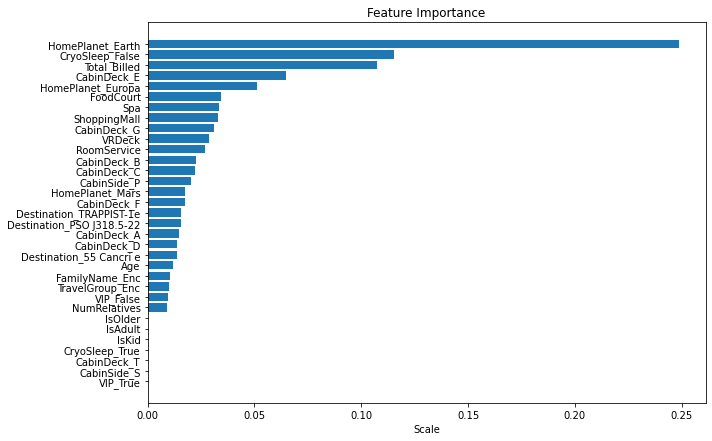

CPU times: user 485 ms, sys: 78.3 ms, total: 563 ms
Wall time: 456 ms


In [55]:
%%time
plt.figure(figsize = (10,7))
feature_importance(cls)

In [56]:
%%time
preds = cls.predict(tst_data[features])

CPU times: user 44.4 ms, sys: 935 µs, total: 45.3 ms
Wall time: 27.2 ms


In [57]:
%%time
sub['Transported'] = preds
sub.to_csv('submission_simple_split_03112022.csv', index = False)

CPU times: user 11.4 ms, sys: 25 µs, total: 11.4 ms
Wall time: 11.8 ms


# Time for Optuna

In [58]:
%%time
import optuna

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 10.7 µs


In [59]:
%%time
X_train, X_valid, y_train, y_valid = train_test_split(trn_data[features], trn_data[target_feature])

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 8, 2048)
    max_depth = trial.suggest_int("max_depth", 2, 16)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.2)
    subsample = trial.suggest_float("subsample", 0.5, 1)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1)
    reg_lambda = trial.suggest_float("reg_lambda", 1, 20)
    reg_alpha = trial.suggest_float("reg_alpha", 0, 20)
    gamma = trial.suggest_float("gamma", 0, 20)
    min_child_weight  = trial.suggest_int("min_child_weight", 0, 128)
    
    clf = XGBClassifier(n_estimators  = n_estimators,
                       learning_rate = learning_rate,
                       max_depth = max_depth,
                       subsample = subsample,
                       colsample_bytree = colsample_bytree,
                       reg_lambda = reg_lambda,
                       reg_alpha = reg_alpha,
                       gamma = gamma,
                       min_child_weight = min_child_weight,
                       random_state  = 69,
                       objective = 'binary:logistic',
                       tree_method = 'gpu_hist',
                      )
    
    clf.fit(X_train, y_train)
    
    valid_pred = clf.predict(X_valid)
    score = accuracy_score(y_valid, valid_pred)
    
    return score

CPU times: user 4.67 ms, sys: 1.94 ms, total: 6.61 ms
Wall time: 6.1 ms


In [60]:
%%time
#study = optuna.create_study(direction = "maximize")
#study.optimize(objective, n_trials = 100)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.39 µs


In [61]:
%%time
#parameters = study.best_params
#parameters

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


# Training a ML Classifier Using a N Fold CV Loop

In [62]:
%%time
import optuna
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

CPU times: user 24 µs, sys: 2 µs, total: 26 µs
Wall time: 31 µs


In [63]:
%%time
N_SPLITS = 20
folds = StratifiedKFold(n_splits = N_SPLITS, shuffle = True)

CPU times: user 40 µs, sys: 0 ns, total: 40 µs
Wall time: 45.3 µs


In [64]:
%%time
optuna_params = {'n_estimators': 474,
 'max_depth': 12,
 'learning_rate': 0.17092496820170439,
 'subsample': 0.8681931753955343,
 'colsample_bytree': 0.6753406152924646,
 'reg_lambda': 8.439432864212677,
 'reg_alpha': 1.6521594249189673,
 'gamma': 9.986385923158347,
 'min_child_weight': 11,
 'random_state': 69,
 'objective': 'binary:logistic',
 'tree_method':'gpu_hist',}

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


In [65]:
%%time

scores  = []
y_probs = []

for fold, (trn_id, val_id) in enumerate(folds.split(trn_data[features], trn_data[target_feature])):  
    X_train, y_train = trn_data[features].iloc[trn_id], trn_data[target_feature].iloc[trn_id]
    X_valid, y_valid = trn_data[features].iloc[val_id], trn_data[target_feature].iloc[val_id]
    
    #scaler = MinMaxScaler()
    #X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
    #X_valid[numerical_features] = scaler.transform(X_valid[numerical_features])
        
    model = XGBClassifier(**optuna_params)
    model.fit(X_train, y_train, eval_set = [(X_valid, y_valid)], eval_metric = ['logloss'], early_stopping_rounds = 50, verbose = False)
    
    valid_pred = model.predict(X_valid)
    valid_score = accuracy_score(y_valid, valid_pred)
    
    print("Fold:", fold, "Accuracy:", valid_score)
    scores.append(valid_score)
    #tst_data[numerical_features] = scaler.transform(tst_data[numerical_features])
    y_probs.append(model.predict_proba(tst_data[features]))

Fold: 0 Accuracy: 0.7770114942528735
Fold: 1 Accuracy: 0.8229885057471265
Fold: 2 Accuracy: 0.8206896551724138
Fold: 3 Accuracy: 0.7839080459770115
Fold: 4 Accuracy: 0.7770114942528735
Fold: 5 Accuracy: 0.8091954022988506
Fold: 6 Accuracy: 0.8
Fold: 7 Accuracy: 0.7609195402298851
Fold: 8 Accuracy: 0.8068965517241379
Fold: 9 Accuracy: 0.7862068965517242
Fold: 10 Accuracy: 0.7954022988505747
Fold: 11 Accuracy: 0.7862068965517242
Fold: 12 Accuracy: 0.8091954022988506
Fold: 13 Accuracy: 0.8248847926267281
Fold: 14 Accuracy: 0.8087557603686636
Fold: 15 Accuracy: 0.8087557603686636
Fold: 16 Accuracy: 0.7995391705069125
Fold: 17 Accuracy: 0.7672811059907834
Fold: 18 Accuracy: 0.8248847926267281
Fold: 19 Accuracy: 0.7995391705069125
CPU times: user 6.31 s, sys: 474 ms, total: 6.78 s
Wall time: 6.76 s


In [66]:
%%time
print("Mean accuracy score:", np.array(scores).mean())

Mean accuracy score: 0.7984636368451719
CPU times: user 341 µs, sys: 0 ns, total: 341 µs
Wall time: 265 µs


In [67]:
# Mean accuracy score: 0.8035192541977858
# Mean accuracy score: 0.8046655013507072
# Mean accuracy score: 0.8084726415594046
# Mean accuracy score: 0.8043222628317178
# Mean accuracy score: 0.8043269446979618
# Mean accuracy score: 0.8050191570881226
# Mean accuracy score: 0.7999563006515177
# Mean accuracy score: 0.8024831823719477
# Mean accuracy score: 0.7991493193495418

In [68]:
%%time
y_prob = sum(y_probs) / len(y_probs)
y_prob_results = np.argmax(y_prob, axis = 1)
y_prob_results = y_prob_results.astype('bool')

sub['Transported'] = y_prob_results
sub.to_csv('submission_twenty_fold_loop_03112022.csv', index = False)

CPU times: user 10.1 ms, sys: 0 ns, total: 10.1 ms
Wall time: 9.94 ms
